**Общая информация**

**Срок сдачи:** 21 октября 2019, 08:30 

**Штраф за опоздание:** по 0.5 балла за 24 часа задержки. Через 10 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0919, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Невыполнение PEP8 -0.5 баллов
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
pip install pycodestyle pycodestyle_magic flake8

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata, fetch_20newsgroups

from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

In [4]:
from sklearn.neighbors import KDTree
from sklearn.metrics import pairwise_distances

class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
    
    def fit(self, X, y):
        self.train_y = y.astype(int)
        self.train_x = X
        self.number_of_classes = len(np.unique(self.train_y))
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(np.array(X))
    
    def predict(self, X):
        if self.algorithm == 'kd_tree':
            indexes_of_nearest_objects = self.tree.query(X, self.n_neighbors)[1]
        else:
            indexes_of_nearest_objects = np.argpartition(pairwise_distances(X, self.train_x), self.n_neighbors)[:, :self.n_neighbors]
        nearest_classes = self.train_y[indexes_of_nearest_objects]
        return np.array(list(map(lambda x: np.argmax(np.bincount(x)), nearest_classes)))

    def predict_proba(self, X):
        if self.algorithm == 'kd_tree':
            indexes_of_nearest_objects = self.tree.query(X, k=self.n_neighbors)[1]
        else:
            indexes_of_nearest_objects = np.argpartition(pairwise_distances(X, self.train_x), self.n_neighbors)[:, :self.n_neighbors]
        nearest_classes = self.train_y[indexes_of_nearest_objects]
        return np.array(list(map(lambda x: np.bincount(x, minlength=self.number_of_classes), nearest_classes))) / self.n_neighbors
    
    def score(self, X, y):
        return (1 - len(np.nonzero(self.predict(X)-y)[0]) / len(y))

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [5]:
iris = datasets.load_iris()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [7]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [8]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [9]:
assert abs(my_clf.score(X_test, y_test) - clf.score(X_test,y_test))<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict и predict_proba сравнимой со sklearn для iris.
Для этого используем numpy

In [10]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.67 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [11]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 186 µs


In [12]:
%time clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.25 ms


array([0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1, 1])

In [13]:
%time my_clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.18 ms


array([0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1, 1])

In [14]:
%time clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 15.6 ms, total: 15.6 ms
Wall time: 1.98 ms


array([[1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ]])

In [15]:
%time my_clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.09 ms


array([[1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ]])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris.
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

In [16]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.65 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 623 µs


In [20]:
%time clf.predict(X_test)

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 3.95 ms


array([1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 2])

In [21]:
%time my_clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.37 ms


array([1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 2])

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.83 ms


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.15 ms


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [24]:
assert abs(my_clf.score(X_test, y_test) - clf.score(X_test,y_test))<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [25]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [26]:
data = newsgroups['data']
target = newsgroups['target']

Переведите во всех документах все буквы в нижний регистр и замените во всех документах символы, не
являющиеся буквами и цифрами, на пробелы. Далее разбейте текста по пробельным символам на токены(термы/слова). Удалите текста, содержащие только пробелы.

In [27]:
import re
data_tok = list()
data_2 = list()
data_1 = list()
#data_tok =  #realize here
# data_tok should be a list of lists of tokens for each line in data.
for i in range (len(data)):
    data_1.append(re.sub('\s+', ' ', (re.sub(r"[^A-Za-z0-9\s]+", ' ', data[i].lower()))))
    data_2.append(re.sub('\s+',' ',data_1[i]))
for i in range (len(data_2)):
    data_2[i] = list(filter(None, re.split('\W', data_2[i])))
    #if data_2[i]: (с этим условием не будет ругаться последняя строчка в следующем блоке,
    #но размер data_tok уменьшится с 11304 до 11004)
    data_tok.append(data_2[i])

In [28]:
len(data_tok)

11314

In [29]:
assert all(isinstance(row, (list, tuple)) for row in data_tok), "please convert each line into a list of tokens (strings)"
assert all(all(isinstance(tok, str) for tok in row) for row in data_tok), "please convert each line into a list of tokens (strings)"
is_latin = lambda tok: all('a' <= x.lower() <= 'z' for x in tok)
#assert all(map(lambda l: not is_latin(l) or l.islower() , map(' '.join, data_tok))), "please make sure that you lowercase the data and drop spaced texts"

Преобразуйте датасет в разреженную матрицу scipy.sparse.csr_matrix, где значение x в позиции (i, j)
означает, что в документе i слово j встретилось x раз

In [30]:
words = set(data_tok[0])
for i in range (1, len(data_tok)):
    words = set.union(words,set(data_tok[i]))

In [31]:
dictionary = dict.fromkeys(list(words))
dictionary = dict([*zip(dictionary.keys(),range(len(words)))])

In [32]:
dictionary

{'grabserver': 0,
 'f6k': 1,
 'devon': 2,
 'acgi6f': 3,
 'relays': 4,
 'mpb9': 5,
 'efficacy': 6,
 '712': 7,
 'ke': 8,
 '1zc': 9,
 'york': 10,
 'meditates': 11,
 'acoustic': 12,
 'language': 13,
 'm81': 14,
 'galvanizing': 15,
 'yyx': 16,
 'mvqn': 17,
 'ohstpy': 18,
 'dying': 19,
 'magowan': 20,
 'siren': 21,
 'sinusitis': 22,
 'jznb': 23,
 'thrid': 24,
 'typewriters': 25,
 'uf52': 26,
 'junkyard': 27,
 'ocw': 28,
 'n2q': 29,
 'antialiasing': 30,
 'splitfire': 31,
 'multiples': 32,
 'h11': 33,
 '362': 34,
 'heinbokel': 35,
 'qq3s': 36,
 'v4i654b': 37,
 'spouses': 38,
 '26wc4': 39,
 'videotapes': 40,
 'endowment': 41,
 'cleans': 42,
 'possessors': 43,
 'txr3o': 44,
 'bodied': 45,
 'infill': 46,
 'ozolinsh': 47,
 'cb05nn': 48,
 'xtool': 49,
 'comptest': 50,
 '8ewd5hn7': 51,
 'a941nyu': 52,
 'gmi': 53,
 'motivates': 54,
 'brute': 55,
 '71t3qsw44': 56,
 'y6': 57,
 'sweeter': 58,
 'po8u': 59,
 'nephi': 60,
 'khinchin': 61,
 '0vkjzl': 62,
 'reactions': 63,
 'qvdo': 64,
 'byo': 65,
 '749p': 6

In [33]:
from scipy.sparse import csr_matrix 
from collections import Counter
val = list()
rows = list()
cols = list()
tmp = 0
for string in data_tok:
    val.extend(dict(Counter(string)).values())
    for word in dict(Counter(string)).keys():
        cols.append(dictionary[word])
        rows.append(tmp)
    tmp += 1
matrix = csr_matrix((val, (rows, cols)), shape=(len(data_tok), len(dictionary)))    

In [34]:
matrix

<11314x98734 sparse matrix of type '<class 'numpy.int64'>'
	with 1147077 stored elements in Compressed Sparse Row format>

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [35]:
train = matrix

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [37]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.33)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
error_train = np.mean(y_train != y_train_predict)
error_test  = np.mean(y_test  != y_test_predict)
print (error_train, error_test)

0.5493403693931398 0.807177289769684


In [38]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.33)
knn = MyKNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
error_train = np.mean(y_train != y_train_predict)
error_test  = np.mean(y_test  != y_test_predict)
print (error_train, error_test)

0.5572559366754617 0.807177289769684


In [39]:
scores = cross_val_score(KNeighborsClassifier(), train, target, cv=3)
scores 

array([0.18331126, 0.18870925, 0.19835369])

In [40]:
scores = cross_val_score(MyKNeighborsClassifier(n_neighbors = 5), train, target, cv=3)
scores

array([0.18331126, 0.18870925, 0.19835369])

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальный score в среднем на валидации на 3 фолдах).
Постройте график зависимости среднего score от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
#задаем сетку
param_grid = {'n_neighbors': np.arange(1,10)}
#задаем количество fold-ов для кросс-валидации
f = 3
#объявляем классификатор
estimator_knn = KNeighborsClassifier()
#передаем сетку, классификатор и количество fold-ов в метод подбора параметров по сетке
optimazer_knn = GridSearchCV(estimator_knn, param_grid, cv = f)
#запускаем подбор параметров по сетке на обучающей выборке
optimazer_knn.fit(X_train, y_train)
#смотрим лучшие параметры и качество алгоритма на лучших параметрах
print (optimazer_knn.best_score_)
print (optimazer_knn.best_params_)


0.18891820580474933
{'n_neighbors': 1}


In [43]:
#задаем сетку
param_grid = {'n_neighbors': np.arange(1,10)}
#задаем количество fold-ов для кросс-валидации
f = 3
#объявляем классификатор
estimator_knn = MyKNeighborsClassifier('n_neighbors')
#передаем сетку, классификатор и количество fold-ов в метод подбора параметров по сетке
optimazer_knn = GridSearchCV(estimator_knn, param_grid, cv = f)
#запускаем подбор параметров по сетке на обучающей выборке
optimazer_knn.fit(X_train, y_train)
#смотрим лучшие параметры и качество алгоритма на лучших параметрах
print (optimazer_knn.best_score_)
print (optimazer_knn.best_params_)

0.18891820580474933
{'n_neighbors': 1}


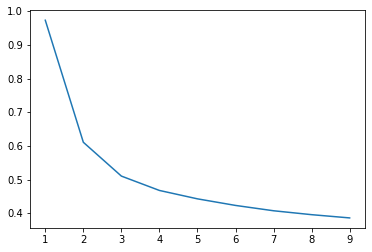

In [44]:
scores = list()
for i in range(1, 10):
    knn = MyKNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_train,y_train))
plt.plot(range(1, 10), scores)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf преобразование( sklearn.feature_extraction.text.TfidfTransformer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [45]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [46]:
data = newsgroups['data']
target = newsgroups['target']

In [47]:
import re
data_tok = list()
data_2 = list()
data_1 = list()
#data_tok =  #realize here
# data_tok should be a list of lists of tokens for each line in data.
for i in range (len(data)):
    data_1.append(re.sub('\s+', ' ', (re.sub(r"[^A-Za-z0-9\s]+", ' ', data[i].lower()))))
    data_2.append(re.sub('\s+',' ',data_1[i]))
for i in range (len(data_2)):
    data_2[i] = list(filter(None, re.split('\W', data_2[i])))
    #if data_2[i]
    data_tok.append(data_2[i])

In [ ]:
from scipy.sparse import csr_matrix 
from collections import Counter
val = list()
rows = list()
cols = list()
tmp = 0
for string in data_tok:
    d = dict(Counter(string))
    k = list(d.keys())
    l = list()
    for i in k:
        if i in list(dictionary.keys()):
            l.append(i)
    string_new = {}
    for lol in l:
        string_new.update({lol: d[lol]})
    val.extend(string_new.values())
    for word in string_new.keys():
        cols.append(dictionary[word])
        rows.append(tmp)
    tmp += 1
matrix = csr_matrix((val, (rows, cols)), shape=(len(data_tok), len(dictionary)))    

In [ ]:
train = matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.33)
knn = MyKNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
error_train = np.mean(y_train != y_train_predict)
error_test  = np.mean(y_test  != y_test_predict)
print (error_train, error_test)

Оценим качество(score) вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

Будет отличаться в следствии того, что часть слов, содержащихся в текстах тестовой выборки, не содержится ни в одном из текстов тренировочной, и наоборот.